In [169]:
printmd('Health Care Diabetic Predictor Capstone Project')
printmd('Exploratory Data Analysis and  Data Balancing')
printmd(' ')
printmd('Contains 10 Machine Learning Models and 1 Deep Neural Network Model ')
printmd('Deep Neural Network Model has 11 Layers (4 Fully Connected) and 1,47,393 Parameters')
printmd(' ')
printmd('Machine Learning Models are : ')
printmd('K Nearest Neighbor, Support Vector, Naive Bayes, Random Forest, Ada Boost, Gradient Boosting, \
        Logistic Regression CV, Stochastic Gradient Descent, Decision Tree and XGBoost ')
printmd(' ')
printmd('Feature Importance charts of Decision Tree and XGB Classifiers,')
printmd('Classification Reports, Confusion Matrices and Roc curves with Auc values for all 11 Models.')
printmd(' ')
printmd('Deep Neural Network Model has the highest accuracy of 96.40% among all models ')
printmd('Tableau Dashboard and Worksheet screenshots included in the repository')

## <span style="color:#111155">Health Care Diabetic Predictor Capstone Project</span>

## <span style="color:#111155">Exploratory Data Analysis and  Data Balancing</span>

## <span style="color:#111155"> </span>

## <span style="color:#111155">Contains 10 Machine Learning Models and 1 Deep Neural Network Model </span>

## <span style="color:#111155">Deep Neural Network Model has 11 Layers (4 Fully Connected) and 1,47,393 Parameters</span>

## <span style="color:#111155"> </span>

## <span style="color:#111155">Machine Learning Models are : </span>

## <span style="color:#111155">K Nearest Neighbor, Support Vector, Naive Bayes, Random Forest, Ada Boost, Gradient Boosting,         Logistic Regression CV, Stochastic Gradient Descent, Decision Tree and XGBoost </span>

## <span style="color:#111155"> </span>

## <span style="color:#111155">Feature Importance charts of Decision Tree and XGB Classifiers,</span>

## <span style="color:#111155">Classification Reports, Confusion Matrices and Roc curves with Auc values for all 11 Models.</span>

## <span style="color:#111155"> </span>

## <span style="color:#111155">Deep Neural Network Model has the highest accuracy of 96.40% among all models </span>

## <span style="color:#111155">Tableau Dashboard and Worksheet screenshots included in the repository</span>

In [1]:
################################################################################################################################
# Import all libraries required for EDA and Machine Learning model building
################################################################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:#111155">'+string+'</span>'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, \
roc_curve,precision_recall_curve,recall_score

In [4]:
################################################################################################################################
# read the Diabetic details csv file
################################################################################################################################
HDiabData = pd.read_csv('./datasets/health care diabetes.csv')

In [5]:
################################################################################################################################
# check the details suxh as null values, datatypes , number of rows and columns etc
################################################################################################################################
HDiabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
################################################################################################################################
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
################################################################################################################################

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
################################################################################################################################
# apply the memory reducing function on the read file
################################################################################################################################
reduce_mem_usage(HDiabData)

Memory usage of dataframe is 0.05 MB --> 0.01 MB (Decreased by 76.2%)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6      148             72             35        0  33.599998   
1              1       85             66             29        0  26.600000   
2              8      183             64              0        0  23.299999   
3              1       89             66             23       94  28.100000   
4              0      137             40             35      168  43.099998   
..           ...      ...            ...            ...      ...        ...   
763           10      101             76             48      180  32.900002   
764            2      122             70             27        0  36.799999   
765            5      121             72             23      112  26.200001   
766            1      126             60              0        0  30.100000   
767            1       93             70             31        0  30.400000   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [8]:
################################################################################################################################
# check the statictics of the input file- max, min, std, 25%....
################################################################################################################################
HDiabData.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992609                  0.471876   33.240885    0.348958  
std      7.884162                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.299999                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.599998                  0.626250   41.000000    1.000000  
max     67.099998                  2.420000   81.000000    1.000000

In [9]:
printmd("Zero minimum values doesn't make sense for some of the above variables." )
printmd("I have to impute these fields except pregnancies, which could be zero ")

## <span style="color:#111155">Zero minimum values doesn't make sense for some of the above variables.</span>

## <span style="color:#111155">I have to impute these fields except pregnancies, which could be zero </span>

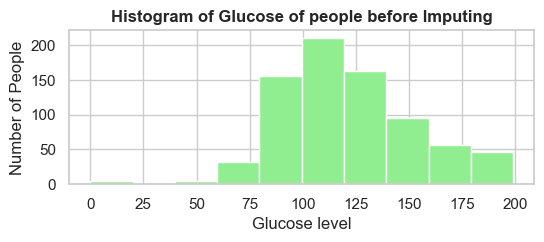

In [10]:
################################################################################################################################
# check the distribution of data among different varaibles before imputing. Start with Glucose levels field
################################################################################################################################
plt.figure(figsize=(6,2.0))  
plt.hist(HDiabData['Glucose'],color='lightgreen')
plt.title('Histogram of Glucose of people before Imputing',fontweight='bold' )
plt.xlabel('Glucose level')
plt.ylabel('Number of People')
plt.show()

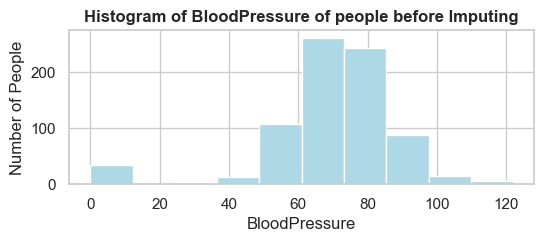

In [11]:
################################################################################################################################
# check the data distribution of Blood pressure field
################################################################################################################################
plt.figure(figsize=(6,2.0))  
plt.hist(HDiabData['BloodPressure'],color='lightblue')
plt.title('Histogram of BloodPressure of people before Imputing',fontweight='bold' )
plt.xlabel('BloodPressure')
plt.ylabel('Number of People')
plt.show()

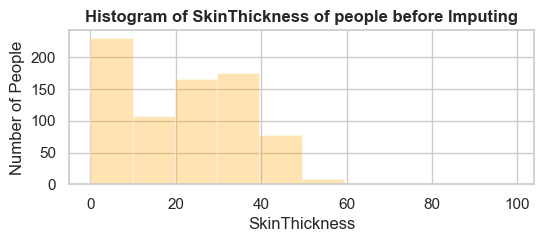

In [12]:
################################################################################################################################
# check the data distribution of Skin thickness field
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['SkinThickness'],color='orange',alpha=.3)
plt.title('Histogram of SkinThickness of people before Imputing',fontweight='bold' )
plt.xlabel('SkinThickness')
plt.ylabel('Number of People')
plt.show()

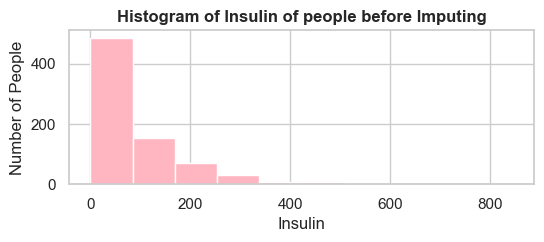

In [13]:
################################################################################################################################
# check the data distribution of Insulin field
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['Insulin'],color='lightpink')
plt.title('Histogram of Insulin of people before Imputing',fontweight='bold' )
plt.xlabel('Insulin')
plt.ylabel('Number of People')
plt.show()

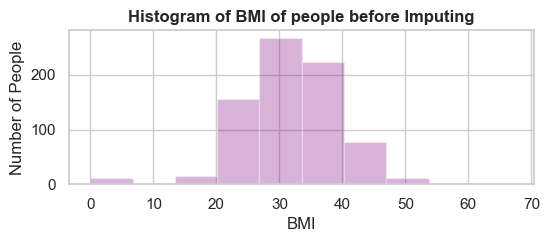

In [14]:
################################################################################################################################
# check the data distribution of BMI field
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['BMI'],color='purple',alpha=.3)
plt.title('Histogram of BMI of people before Imputing',fontweight='bold' )
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.show()

In [15]:
################################################################################################################################
# convert all the 0 values to null value in Insulin, Glucose, BP,BMI and SkinThickNess fields for imputing purpose
################################################################################################################################
HDiabData['Insulin'] = HDiabData['Insulin'].apply(lambda x:np.nan if x==0 else x)
HDiabData['Glucose'] = HDiabData['Glucose'].apply(lambda x:np.nan if x==0 else x)
HDiabData['BloodPressure'] = HDiabData['BloodPressure'].apply(lambda x:np.nan if x==0 else x)
HDiabData['SkinThickness'] = HDiabData['SkinThickness'].apply(lambda x:np.nan if x==0 else x)
HDiabData['BMI'] = HDiabData['BMI'].apply(lambda x:np.nan if x==0 else x)

In [16]:
# imputing with combination of Backward fill and forward fills to avoid biasing. Mode,median and mean are creating biased data

In [17]:
################################################################################################################################
# Impute all these fileds with combination of Forwardfills and Backward fills to avoid data becomming biased.As some fields 
# have a lot of null/zero values. Lets start with Backward fill for 3 rows
################################################################################################################################
HDiabData['Insulin'] = HDiabData['Insulin'].bfill(limit=3)
HDiabData['Glucose'] = HDiabData['Glucose'].bfill(limit=3)
HDiabData['BloodPressure'] = HDiabData['BloodPressure'].bfill(limit=3)
HDiabData['SkinThickness'] = HDiabData['SkinThickness'].bfill(limit=3)
HDiabData['BMI'] = HDiabData['BMI'].bfill(limit=3)

In [18]:
################################################################################################################################
# Then forward fill all the remaing null rows for another 3 rows
################################################################################################################################
HDiabData['Insulin'] = HDiabData['Insulin'].ffill(limit=3)
HDiabData['Glucose'] = HDiabData['Glucose'].ffill(limit=3)
HDiabData['BloodPressure'] = HDiabData['BloodPressure'].ffill(limit=3)
HDiabData['SkinThickness'] = HDiabData['SkinThickness'].ffill(limit=3)
HDiabData['BMI'] = HDiabData['BMI'].ffill(limit=3)

In [19]:
################################################################################################################################
# Then Backward fill all remaining rows
################################################################################################################################
HDiabData['Insulin'] = HDiabData['Insulin'].bfill()
HDiabData['Glucose'] = HDiabData['Glucose'].bfill()
HDiabData['BloodPressure'] = HDiabData['BloodPressure'].bfill()
HDiabData['SkinThickness'] = HDiabData['SkinThickness'].bfill()
HDiabData['BMI'] = HDiabData['BMI'].bfill()

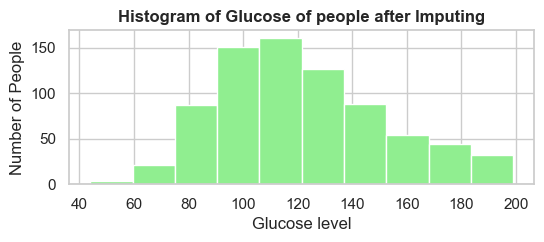

In [20]:
################################################################################################################################
# Ckeck the data distribution of the fields after imputing. Start with Glucose levels
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['Glucose'],color='lightgreen')
plt.title('Histogram of Glucose of people after Imputing' ,fontweight='bold')
plt.xlabel('Glucose level')
plt.ylabel('Number of People')
plt.show()

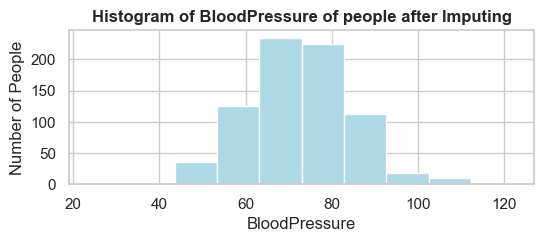

In [21]:
################################################################################################################################
# Check the data distribution of Blood Pressure field after imputing
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['BloodPressure'],color='lightblue')
plt.title('Histogram of BloodPressure of people after Imputing',fontweight='bold' )
plt.xlabel('BloodPressure')
plt.ylabel('Number of People')
plt.show()

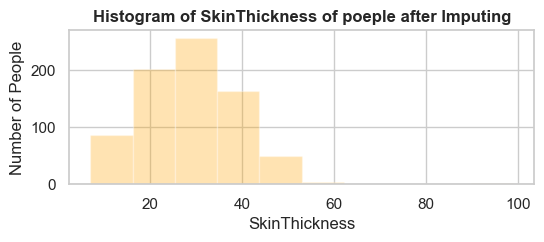

In [22]:
################################################################################################################################
# Check the data distribution of SkinThickNess field after imputing
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['SkinThickness'],color='orange',alpha=.3)
plt.title('Histogram of SkinThickness of poeple after Imputing',fontweight='bold' )
plt.xlabel('SkinThickness')
plt.ylabel('Number of People')
plt.show()

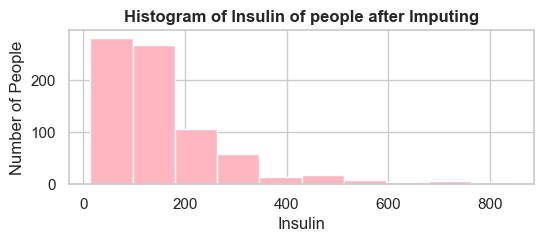

In [23]:
################################################################################################################################
# Check the data distribution of the Insulin field after imputing
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['Insulin'],color='lightpink')
plt.title('Histogram of Insulin of people after Imputing',fontweight='bold' )
plt.xlabel('Insulin')
plt.ylabel('Number of People')
plt.show()

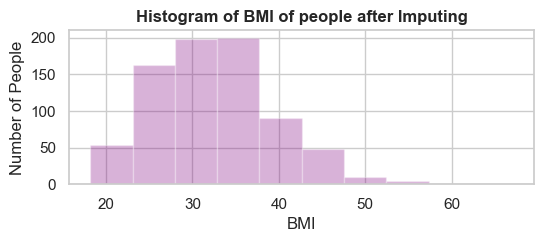

In [24]:
################################################################################################################################
# Check the data distribution of the BMI field after imputing
################################################################################################################################
plt.figure(figsize=(6,2))  
plt.hist(HDiabData['BMI'],color='purple',alpha=.3)
plt.title('Histogram of BMI of people after Imputing' ,fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.show()

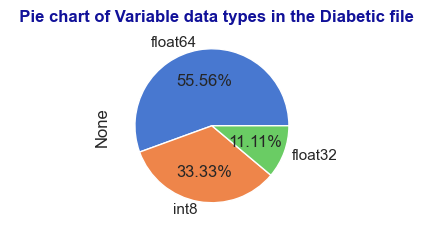

In [25]:
################################################################################################################################
# Check the data type distribution of the diabetic detail file 
################################################################################################################################
plt.figure(figsize=(6,2.5))
HDiabData.dtypes.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('  Pie chart of Variable data types in the Diabetic file',color='#111199',fontweight='bold' )
plt.show()

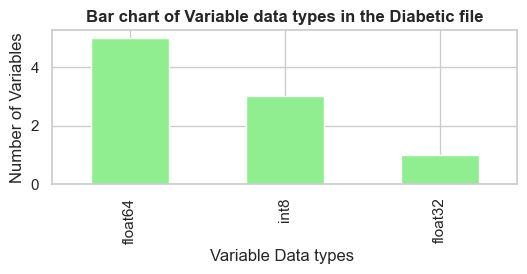

In [26]:
################################################################################################################################
# Check the number and type of variables in the file as q project requirement using bar chart
################################################################################################################################
plt.figure(figsize=(6,2))
HDiabData.dtypes.value_counts().plot(kind='bar',color='lightgreen')
plt.title('Bar chart of Variable data types in the Diabetic file',fontweight='bold' )
plt.xlabel('Variable Data types ')
plt.ylabel('Number of Variables')
plt.show()

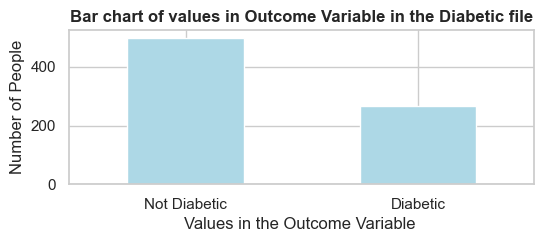

In [27]:
################################################################################################################################
# Check the data distribution of the disease /outcome field
################################################################################################################################
HDiabData['Outcome'] = HDiabData['Outcome'].apply(lambda x:'Diabetic' if x==1 else 'Not Diabetic')
plt.figure(figsize=(6,2))
HDiabData.Outcome.value_counts().plot(kind='bar',color='lightblue')
plt.title('Bar chart of values in Outcome Variable in the Diabetic file',fontweight='bold' )
plt.xlabel('Values in the Outcome Variable ')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

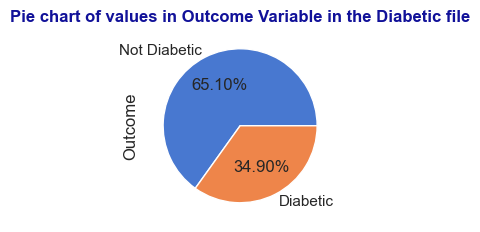

In [29]:
plt.figure(figsize=(6,2.5))
HDiabData.Outcome.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Pie chart of values in Outcome Variable in the Diabetic file',color='#111199',fontweight='bold' )
plt.show()

In [30]:
printmd("Data is little imbalanced; so we will balance it by upsampling the Diabetic types to match the Not-Diabetic type")

## <span style="color:#111155">Data is little imbalanced; so we will balance it by upsampling the Diabetic types to match the Not-Diabetic type</span>

In [31]:
################################################################################################################################
# Check the actual number of rows with disease and non-disease in the outcome field
################################################################################################################################
HDiabData['Outcome'] = HDiabData['Outcome'].apply(lambda x:1 if x=='Diabetic' else 0)
HDiabData.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [32]:
################################################################################################################################
# as said earlier we will upsample the 1 count to match the zero count; split the file into 2 parts one with disease and one
# without disease. We will increase the rows in the disease file and later merge the files back 
################################################################################################################################
HDiabData_ONE = HDiabData[HDiabData['Outcome']==1]
HDiabData_ZERO = HDiabData[HDiabData['Outcome']==0]

In [33]:
################################################################################################################################
# check the shapes of the split files
################################################################################################################################
HDiabData_ZERO.shape, HDiabData_ONE.shape

((500, 9), (268, 9))

In [34]:
################################################################################################################################
# increase the rows in the disease file by 186% to get the count of 500 from 268
################################################################################################################################
HDiabData_ONE = HDiabData_ONE.sample(frac=1.86567,replace=True)


In [35]:
################################################################################################################################
# check the shapes of the disease and no disease files before merging
################################################################################################################################
HDiabData_ZERO.shape, HDiabData_ONE.shape

((500, 9), (500, 9))

In [36]:
################################################################################################################################
# merge it here
################################################################################################################################
HDiabData = pd.concat([HDiabData_ZERO,HDiabData_ONE],axis=0)

In [37]:
################################################################################################################################
# check the shope of the merged file
################################################################################################################################
HDiabData.shape

(1000, 9)

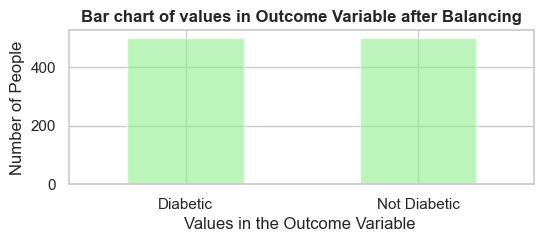

In [38]:
################################################################################################################################
# plot the value counts to visualize the balanced data in the outcome field
################################################################################################################################
HDiabData['Outcome'] = HDiabData['Outcome'].apply(lambda x:'Diabetic' if x==1 else 'Not Diabetic')
HDiabData=HDiabData.sort_values(by='Outcome')
plt.figure(figsize=(6,2))
HDiabData.Outcome.value_counts().plot(kind='bar',color='lightgreen',alpha=.6)
plt.title('Bar chart of values in Outcome Variable after Balancing',fontweight='bold' )
plt.xlabel('Values in the Outcome Variable ')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

In [39]:
printmd("Now the data is perfectly balanced")

## <span style="color:#111155">Now the data is perfectly balanced</span>

<Figure size 1600x2500 with 0 Axes>

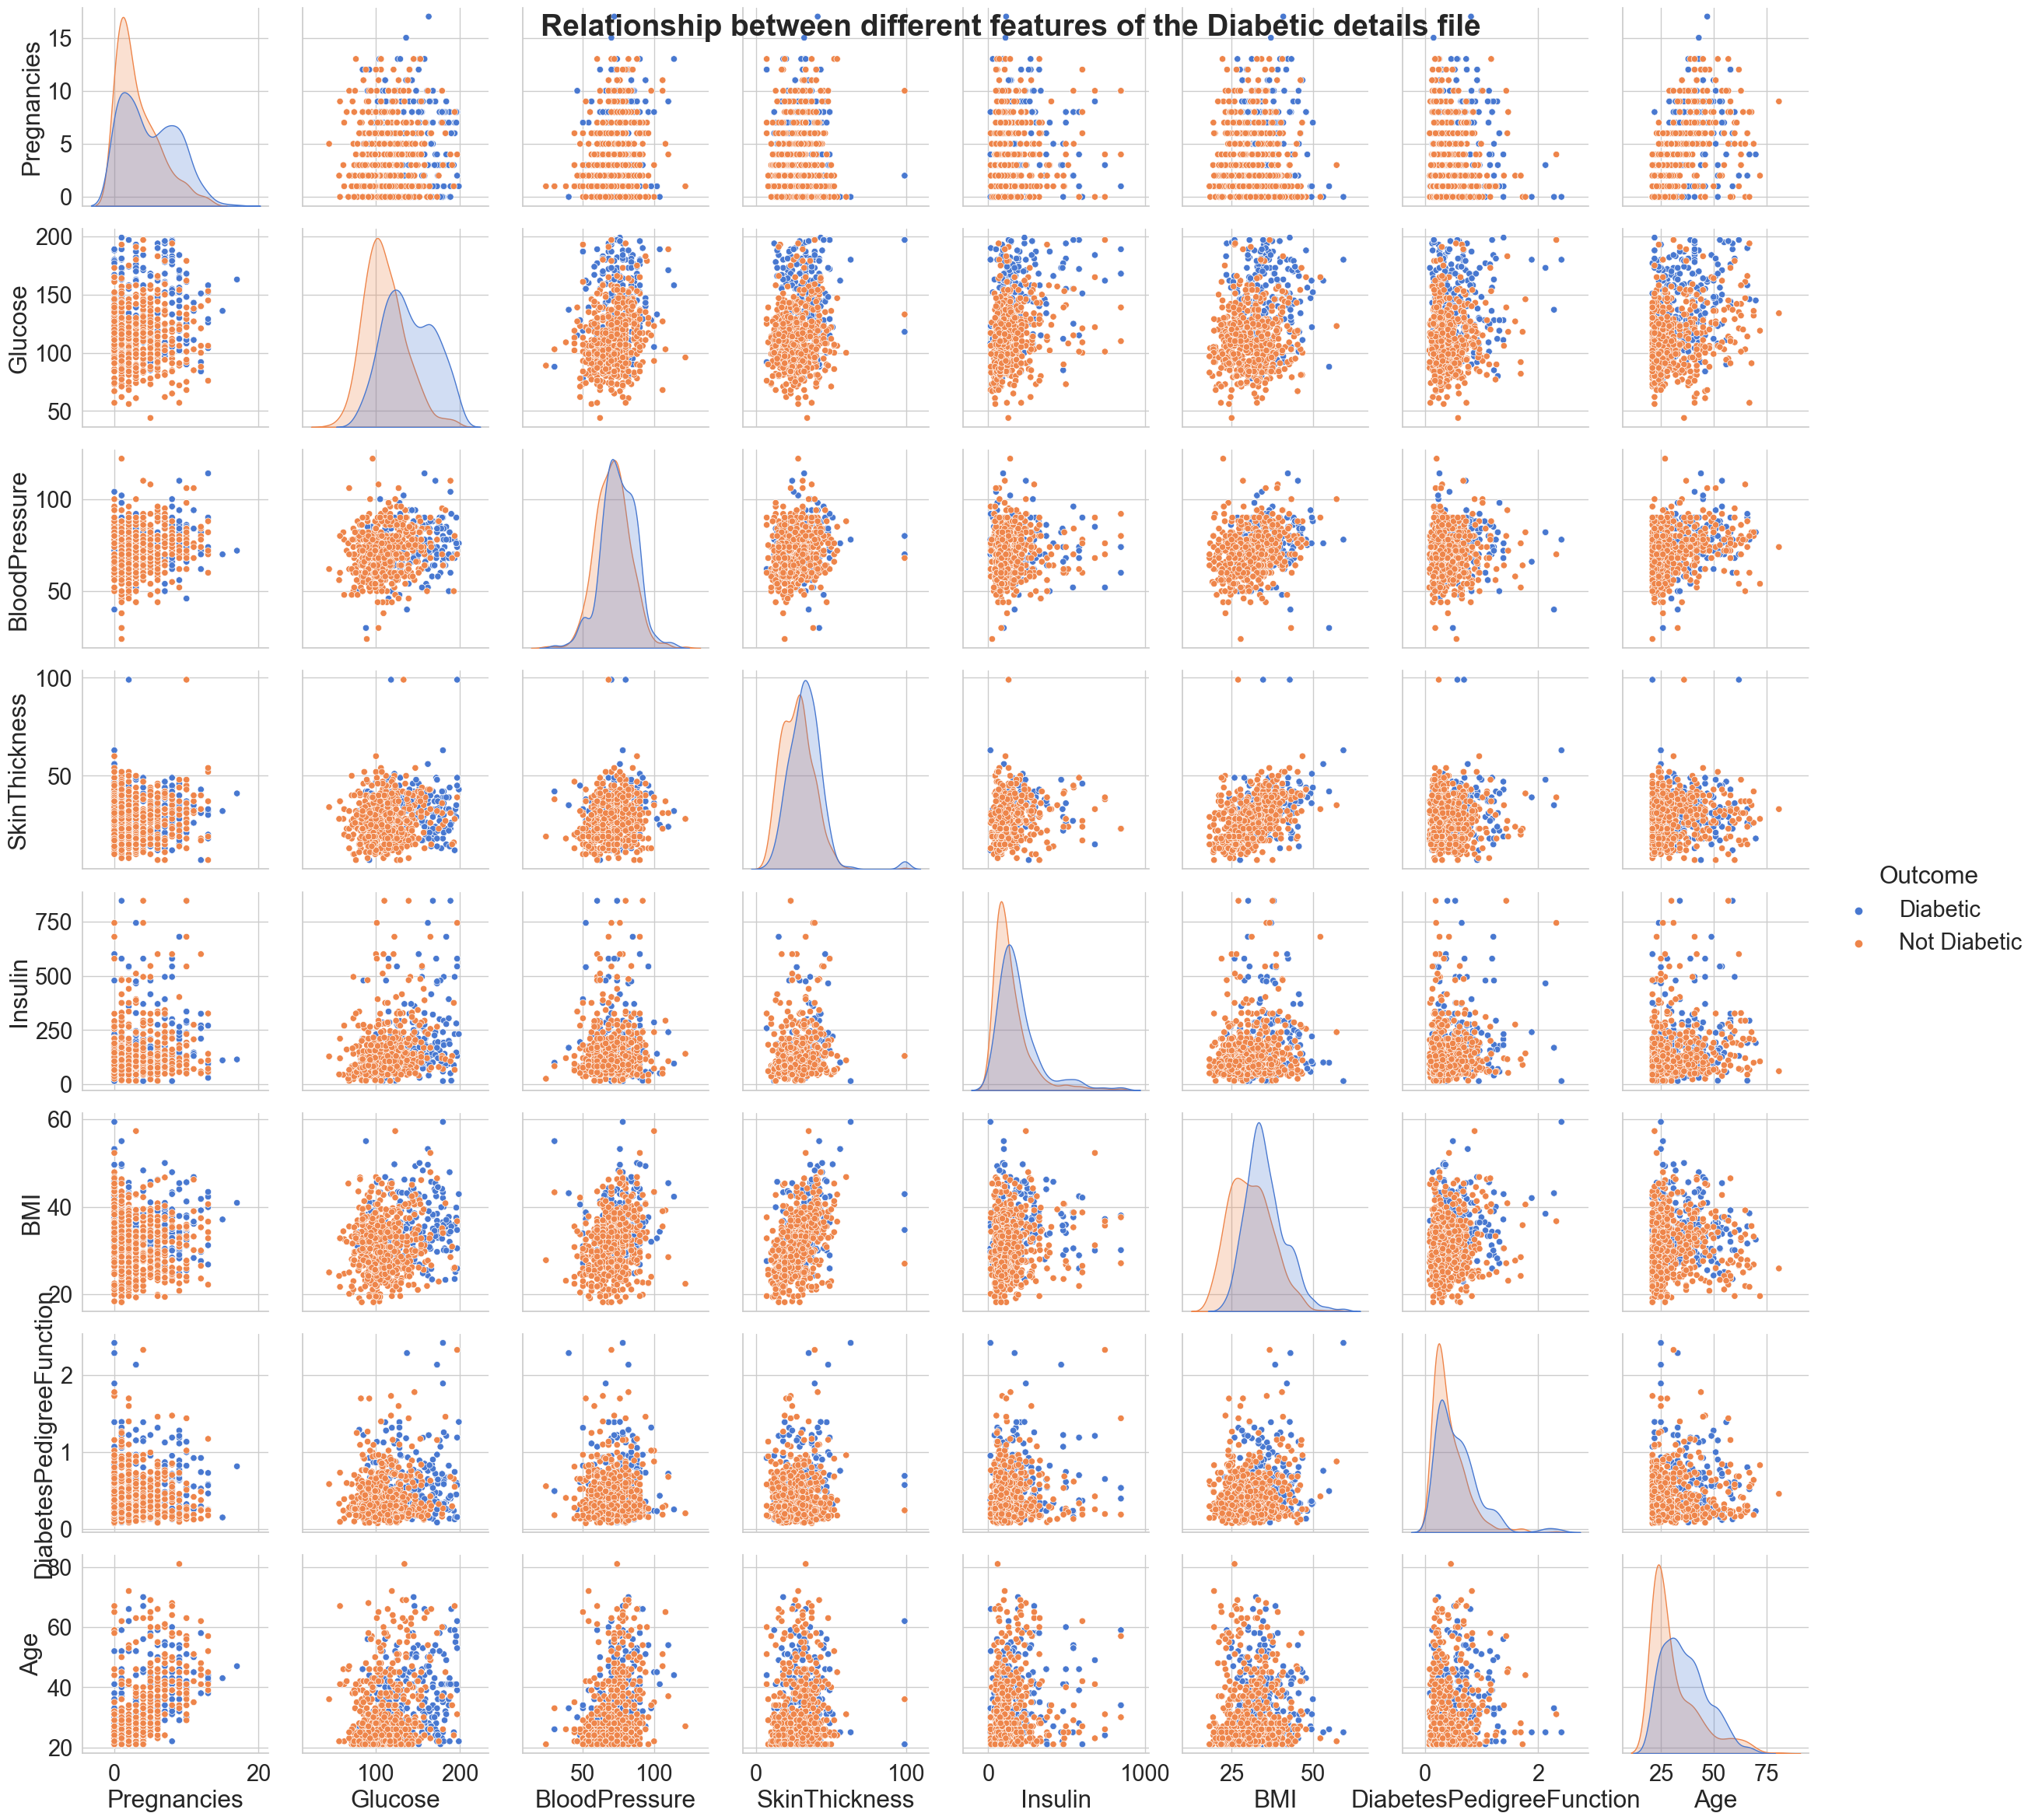

In [40]:
################################################################################################################################
# Scatter plot all variables to show the relationship among them
################################################################################################################################

sns.set(style='whitegrid', palette='muted', font_scale=1.9)
plt.figure(figsize=(16,25))
sns.pairplot(HDiabData,height=3.0,hue='Outcome') 
plt.suptitle('Relationship between different features of the Diabetic details file',fontweight='bold',fontsize=28)
plt.show()

In [41]:
printmd('Let us look at some of the scatter plots individually one by one')

## <span style="color:#111155">Let us look at some of the scatter plots individually one by one</span>

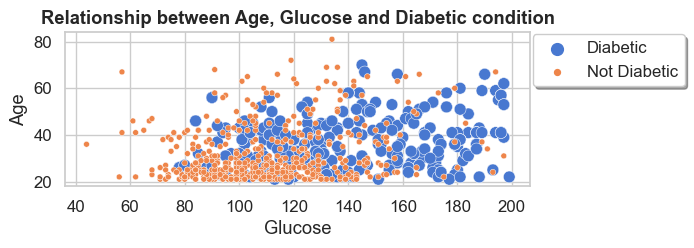

In [42]:
################################################################################################################################
# Let plot some of the variables induvidually to have a clear picture of the relationship between varaiables.
# lets start with Age glucose and Diabetic condition
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.figure(figsize=(6,2))
sns.scatterplot(x=HDiabData['Glucose'],y=HDiabData['Age'],hue=HDiabData['Outcome'],size=HDiabData['Outcome'])
plt.title('Relationship between Age, Glucose and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.show()

In [43]:
printmd('Glucose levels of Diabetic patients are high compared to Non Diabetic patients')

## <span style="color:#111155">Glucose levels of Diabetic patients are high compared to Non Diabetic patients</span>

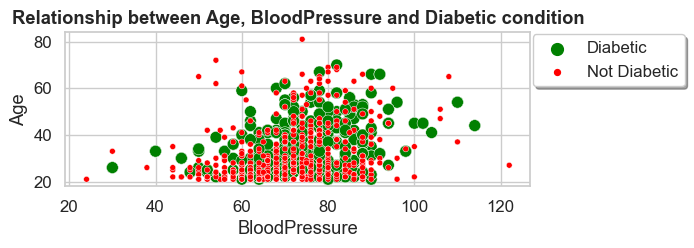

In [44]:
################################################################################################################################
# plot the relationship between age, bloodpressure and diabetic condition
################################################################################################################################
plt.figure(figsize=(6,2))
colorDict={'Not Diabetic':'red','Diabetic':'green'}
sns.scatterplot(x=HDiabData['BloodPressure'],y=HDiabData['Age'],hue=HDiabData['Outcome'],palette=colorDict,\
                size=HDiabData['Outcome'])
plt.title('Relationship between Age, BloodPressure and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.show()

In [45]:
printmd('Age and Blood Pressure are linearly related across all ages for both types')

## <span style="color:#111155">Age and Blood Pressure are linearly related across all ages for both types</span>

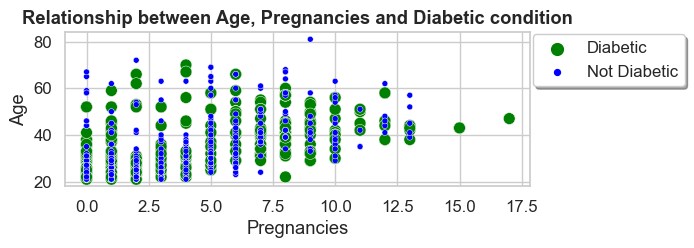

In [46]:
################################################################################################################################
# plot the relationship between age, pregnancies and diabetic condition
################################################################################################################################
plt.figure(figsize=(6,2))
colorDict={'Not Diabetic':'blue','Diabetic':'green'}
sns.scatterplot(x=HDiabData['Pregnancies'],y=HDiabData['Age'],hue=HDiabData['Outcome'],palette=colorDict,\
                size=HDiabData['Outcome'])
plt.title('Relationship between Age, Pregnancies and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.show()

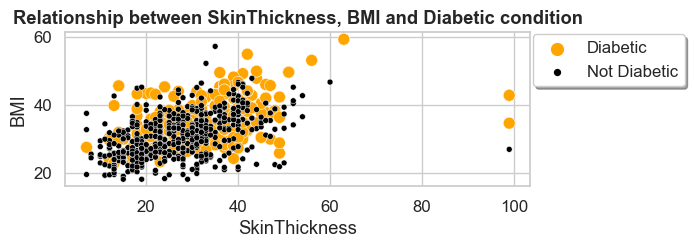

In [47]:
################################################################################################################################
# plot the relationship between skinthickness, BMI and diabetic condition
################################################################################################################################
plt.figure(figsize=(6,2))
colorDict={'Not Diabetic':'black','Diabetic':'orange'}
sns.scatterplot(x=HDiabData['SkinThickness'],y=HDiabData['BMI'],hue=HDiabData['Outcome'],size=HDiabData['Outcome'],\
                palette=colorDict)
plt.title('Relationship between SkinThickness, BMI and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.show()

In [48]:
printmd('BMI and SkinThickNess are linearly realated for both types')

## <span style="color:#111155">BMI and SkinThickNess are linearly realated for both types</span>

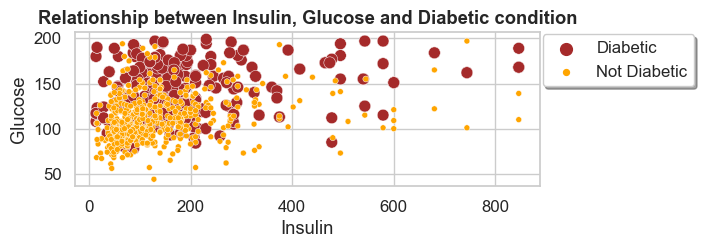

In [49]:
################################################################################################################################
# plot the relationship between insulin, glucose and diabetic condition
################################################################################################################################
plt.figure(figsize=(6,2))
colorDict={'Not Diabetic':'orange','Diabetic':'brown'}
sns.scatterplot(x=HDiabData['Insulin'],y=HDiabData['Glucose'],hue=HDiabData['Outcome'],size=HDiabData['Outcome'],\
                palette=colorDict)
plt.title('Relationship between Insulin, Glucose and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.show()

In [50]:
printmd('Generally, Glucose and Insulin levels of Diabetic patients are high compared to Non Diabetic patients')

## <span style="color:#111155">Generally, Glucose and Insulin levels of Diabetic patients are high compared to Non Diabetic patients</span>

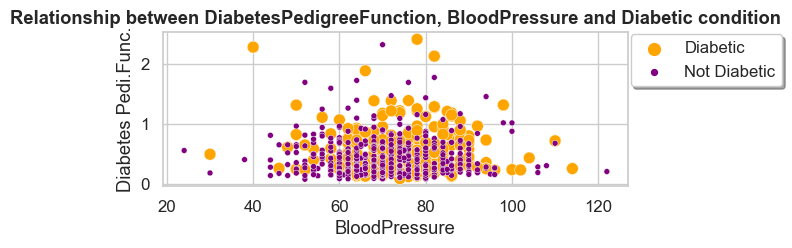

In [51]:
################################################################################################################################
# plot the relationship between DPF, bloodpressure and diabetic condition
################################################################################################################################
plt.figure(figsize=(6,2))
colorDict={'Not Diabetic':'purple','Diabetic':'orange'}
sns.scatterplot(x=HDiabData['BloodPressure'],y=HDiabData['DiabetesPedigreeFunction'],\
                size=HDiabData['Outcome'],hue=HDiabData['Outcome'],palette=colorDict)
plt.title('Relationship between DiabetesPedigreeFunction, BloodPressure and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.ylabel('Diabetes Pedi.Func.')
plt.show()

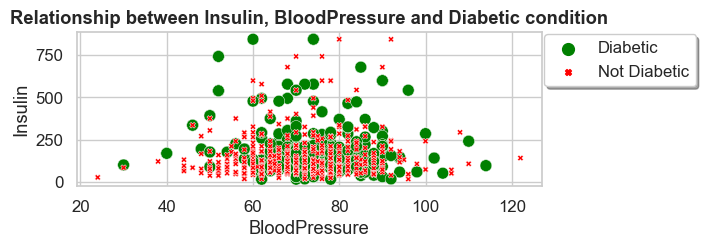

In [52]:
################################################################################################################################
# plot the relationship between insulin, bloodpressure and diabetic condition
################################################################################################################################
plt.figure(figsize=(6,2))
colorDict={'Not Diabetic':'red','Diabetic':'green'}
sns.scatterplot(x=HDiabData['BloodPressure'],y=HDiabData['Insulin'],hue=HDiabData['Outcome'],\
                size=HDiabData['Outcome'],palette=colorDict,style=HDiabData['Outcome'])
plt.title('Relationship between Insulin, BloodPressure and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.show()

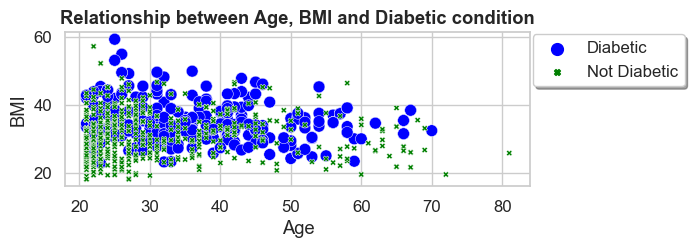

In [53]:
################################################################################################################################
# plot the relationship between age, BMI and diabetic condition
################################################################################################################################
plt.figure(figsize=(6,2))
colorDict={'Not Diabetic':'green','Diabetic':'blue'}
sns.scatterplot(x=HDiabData['Age'],y=HDiabData['BMI'],hue=HDiabData['Outcome'],size=HDiabData['Outcome'],\
                palette=colorDict,style=HDiabData['Outcome'])
plt.title('Relationship between Age, BMI and Diabetic condition',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5),shadow=True)
plt.show()

In [54]:
################################################################################################################################
# Convert the outcome variable vback to o and 1 as reporting part is done
################################################################################################################################
HDiabData['Outcome'] = HDiabData['Outcome'].apply(lambda x:1 if x=='Diabetic' else 0)

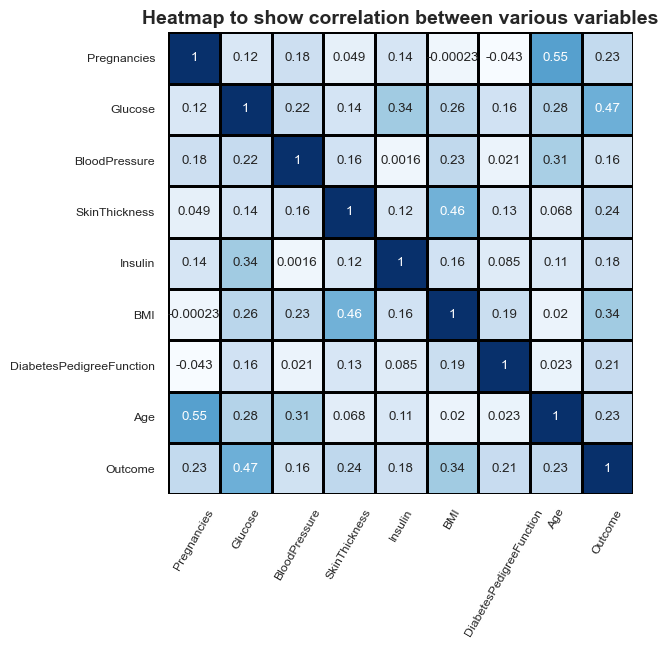

In [55]:
################################################################################################################################
# plot the heatmap of the correlation between all the variables
################################################################################################################################
HDiabDataCorRel = HDiabData.corr()
plt.figure(figsize=(6,6))
sns.set(style='whitegrid', palette='muted', font_scale=0.8)
sns.heatmap(HDiabDataCorRel,annot=True,cbar=False,fmt='.2g',cmap=plt.cm.Blues,
    linewidths=2,
    linecolor='black')
plt.xticks(rotation=60)
plt.title('Heatmap to show correlation between various variables',fontweight='bold',fontsize=14)
plt.show()

In [56]:
printmd('Glucose levels and Diabetic condition are related to great extent')
printmd('Age and Pregnancies,'+'BMI and SkinThickNess are related to some extent.')
printmd('Age and Diabetic condition, BMI and Diabetic condition, Age and Blood Pressure are all lightly related.')

## <span style="color:#111155">Glucose levels and Diabetic condition are related to great extent</span>

## <span style="color:#111155">Age and Pregnancies,BMI and SkinThickNess are related to some extent.</span>

## <span style="color:#111155">Age and Diabetic condition, BMI and Diabetic condition, Age and Blood Pressure are all lightly related.</span>

In [57]:
printmd('Below code is all about Machine Learning Models: ')
printmd('KNN, SVC, Naive Bayes, Logistic Regression, Random Forest, Decision Tree,\
XGBoost, AdaBoost, GradientBoost, SDC and Deep Neural Network Model ')


## <span style="color:#111155">Below code is all about Machine Learning Models: </span>

## <span style="color:#111155">KNN, SVC, Naive Bayes, Logistic Regression, Random Forest, Decision Tree,XGBoost, AdaBoost, GradientBoost, SDC and Deep Neural Network Model </span>

In [58]:
################################################################################################################################
# Extract the details for model building
################################################################################################################################
x_features=HDiabData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_target=HDiabData['Outcome']
x_features.shape,y_target.shape

((1000, 8), (1000,))

In [59]:
################################################################################################################################
# import the train test split module
################################################################################################################################
from sklearn.model_selection import train_test_split

################################################################################################################################
# split the data by default split ratio as 75% and 25% for train and test respectively
################################################################################################################################

x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,random_state=1,stratify=y_target)

################################################################################################################################
# check the shapes of the train test features and target files
################################################################################################################################
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((750, 8), (250, 8), (750,), (250,))

In [60]:
y_test.value_counts()

1    125
0    125
Name: Outcome, dtype: int64

In [61]:
printmd('KNeighborsClassifier algoritham ')

## <span style="color:#111155">KNeighborsClassifier algoritham </span>

Accuracy Score of KNN Model is : 71.2
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[87 38]
 [34 91]]


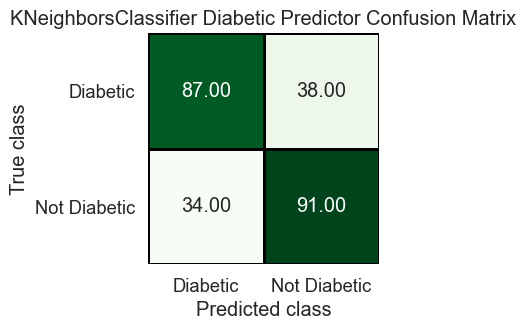

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       0.70      0.72      0.71       121
Not Diabetic       0.73      0.71      0.72       129

    accuracy                           0.71       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.71      0.71      0.71       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


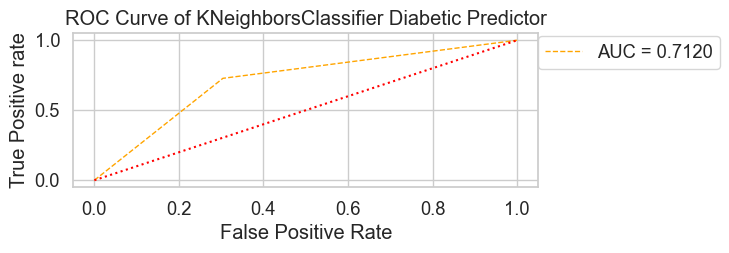

## <span style="color:#111155">Accuracy of KNeighborsClassifier is 71.2 %</span>

In [67]:

################################################################################################################################
# Import the KNN classifier, and instantiate it with 8 neighbors
################################################################################################################################

from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=8)

################################################################################################################################
# fit on train dataset and predict on the test dataset and also print the accuracy score
################################################################################################################################

KNNClassifier.fit(x_train,y_train)
# make prediction for the testing data
y_pred = KNNClassifier.predict(x_test)
print('Accuracy Score of KNN Model is :',np.round(accuracy_score(y_test,y_pred)*100,2))


################################################################################################################################
# print the confusion matrix of the KNN classifier
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.figure(figsize=(3,3))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Greens,\
            cbar=False).set_title('KNeighborsClassifier Diabetic Predictor Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


################################################################################################################################
# print the classification report of the KNN classifier
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))


################################################################################################################################
# plot the ROC_CURVE and print the AUC value in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='orange',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of KNeighborsClassifier Diabetic Predictor') 
plt.grid(True)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()
printmd('Accuracy of KNeighborsClassifier is 71.2 %')

In [63]:
printmd('LogisticRegressionCrossValidation algoritham.')

## <span style="color:#111155">LogisticRegressionCrossValidation algoritham.</span>

Accuracy Score for Logistic Regression CV Model is : 0.73
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[99 26]
 [41 84]]


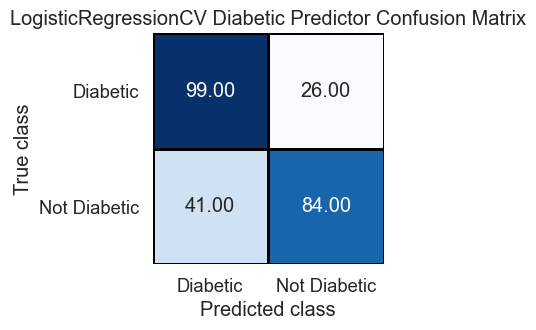

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       0.79      0.71      0.75       140
Not Diabetic       0.67      0.76      0.71       110

    accuracy                           0.73       250
   macro avg       0.73      0.74      0.73       250
weighted avg       0.74      0.73      0.73       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


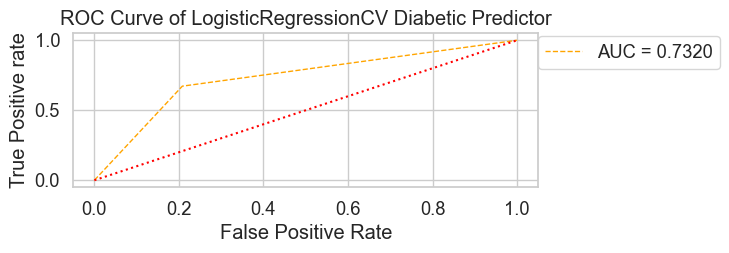

## <span style="color:#111155">LogisticRegressionCrossValidation accuracy is around 73 %. </span>

In [68]:

################################################################################################################################
# Import the Machine learning libraries, instantiate the logisticRegressionCV Algoritham and fit it with train features and labl
################################################################################################################################
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
logreg = LogisticRegressionCV(max_iter=1000,verbose=0,solver='liblinear',penalty='l1',\
                              cv=10,scoring='r2',random_state=1,n_jobs=None)
logreg.fit(x_train,y_train)

################################################################################################################################
# Make pridictions on the test dataset
################################################################################################################################
# make prediction for the testing data
y_pred = logreg.predict(x_test)


################################################################################################################################
# test the accuracy
################################################################################################################################


print('Accuracy Score for Logistic Regression CV Model is :', np.round(accuracy_score(y_test,y_pred),2))


################################################################################################################################
# Plot the confusion matrix to know the TP,TN,FP,AND FN counts
################################################################################################################################

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Blues,\
            cbar=False).set_title('LogisticRegressionCV Diabetic Predictor Confusion Matrix')
plt.yticks(rotation=0)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()  


################################################################################################################################
# Print the classification report to know the precision, recall, f1-score,support and accuracy
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))

################################################################################################################################
# Plot the ROC curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='orange',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of LogisticRegressionCV Diabetic Predictor') 
plt.grid(True)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()

printmd('LogisticRegressionCrossValidation accuracy is around 73 %. ')

In [65]:
##########################----------------------------------

In [66]:
printmd('Gaussian Naive Bayes algoritham.')

## <span style="color:#111155">Gaussian Naive Bayes algoritham.</span>

Accuracy Score for Gaussian Naive Bayes Model is : 0.69
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[97 28]
 [49 76]]


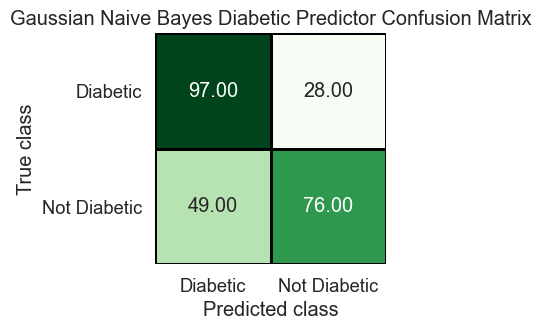

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       0.78      0.66      0.72       146
Not Diabetic       0.61      0.73      0.66       104

    accuracy                           0.69       250
   macro avg       0.69      0.70      0.69       250
weighted avg       0.71      0.69      0.69       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


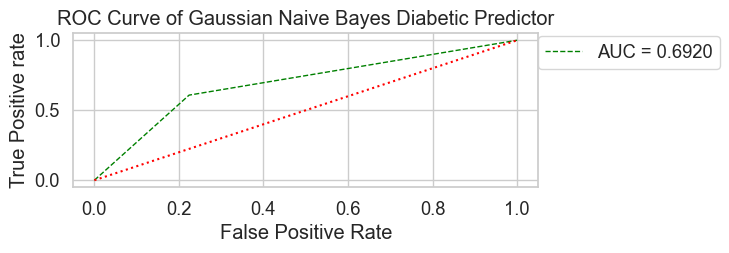

## <span style="color:#111155">Gaussian Naive Bayes accuracy is around 69 %. </span>

In [73]:
################################################################################################################################
# Import the Machine learning libraries, instantiate the BernoulliNB Algoritham and fit it with train features and labl
################################################################################################################################
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB, MultinomialNB
BNB = GaussianNB()
BNB.fit(x_train,y_train)

################################################################################################################################
# Make pridictions on the test dataset
################################################################################################################################
# make prediction for the testing data
y_pred = BNB.predict(x_test)


################################################################################################################################
# test the accuracy
################################################################################################################################


print('Accuracy Score for Gaussian Naive Bayes Model is :', np.round(accuracy_score(y_test,y_pred),2))


################################################################################################################################
# Plot the confusion matrix to know the TP,TN,FP,AND FN counts
################################################################################################################################

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Greens,\
            cbar=False).set_title('Gaussian Naive Bayes Diabetic Predictor Confusion Matrix')
plt.yticks(rotation=0)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()  


################################################################################################################################
# Print the classification report to know the precision, recall, f1-score,support and accuracy
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))

################################################################################################################################
# Plot the ROC curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='green',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of Gaussian Naive Bayes Diabetic Predictor') 
plt.grid(True)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()

printmd('Gaussian Naive Bayes accuracy is around 69 %. ')

In [71]:
#-----------------------------------------------------

In [74]:
printmd('Support Vector Classifier')

## <span style="color:#111155">Support Vector Classifier</span>

[LibSVM]Accuracy Score for Support Vector Model is : 0.89
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[125   0]
 [ 27  98]]


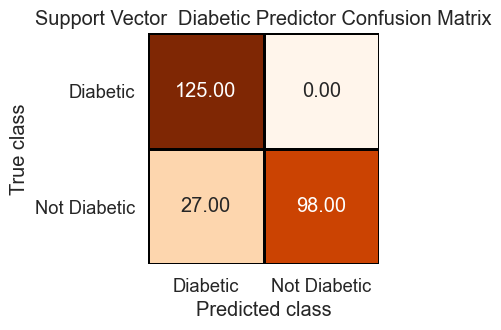

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       1.00      0.82      0.90       152
Not Diabetic       0.78      1.00      0.88        98

    accuracy                           0.89       250
   macro avg       0.89      0.91      0.89       250
weighted avg       0.92      0.89      0.89       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


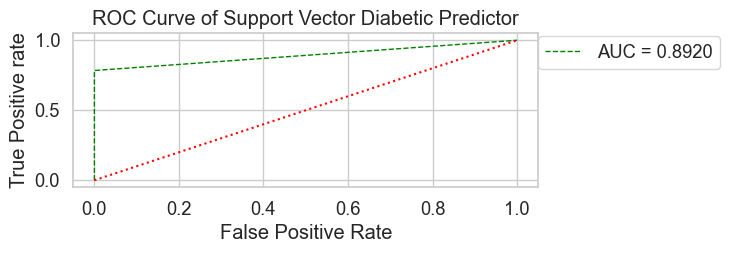

## <span style="color:#111155">Support Vector Classifier accuracy is around 89 %. </span>

In [76]:
################################################################################################################################
# Import the Machine learning libraries, instantiate the Support Vector Machines Algoritham and fit it with train features and labl
################################################################################################################################
from sklearn.svm import LinearSVC, NuSVC, SVC
svc = NuSVC(kernel='rbf',gamma='auto',verbose=True)
svc.fit(x_train,y_train)

################################################################################################################################
# Make pridictions on the test dataset
################################################################################################################################
# make prediction for the testing data
y_pred = svc.predict(x_test)


################################################################################################################################
# test the accuracy
################################################################################################################################


print('Accuracy Score for Support Vector Model is :', np.round(accuracy_score(y_test,y_pred),2))


################################################################################################################################
# Plot the confusion matrix to know the TP,TN,FP,AND FN counts
################################################################################################################################

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Oranges,\
            cbar=False).set_title('Support Vector  Diabetic Predictor Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


################################################################################################################################
# Print the classification report to know the precision, recall, f1-score,support and accuracy
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))

################################################################################################################################
# Plot the ROC curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='green',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of Support Vector Diabetic Predictor') 
plt.grid(True)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()

printmd('Support Vector Classifier accuracy is around 89 %. ')

In [77]:
printmd('Random Forest Classifier algoritham.')

## <span style="color:#111155">Random Forest Classifier algoritham.</span>

Accuracy Score for Random Forest Classifier is : 0.84
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[100  25]
 [ 15 110]]


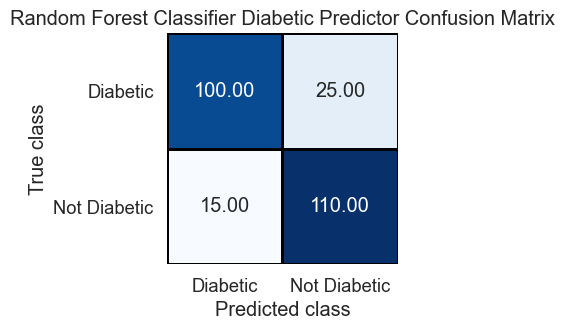

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       0.80      0.87      0.83       115
Not Diabetic       0.88      0.81      0.85       135

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


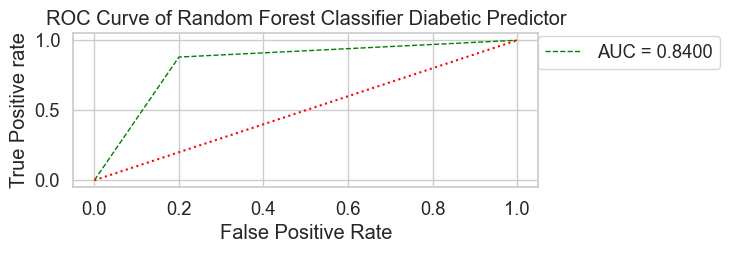

## <span style="color:#111155">Random Forest Classifier accuracy is around 84 %. </span>

In [86]:
################################################################################################################################
# Import the Machine learning libraries, instantiate the Support Vector Machines Algoritham and fit it with train feat. and labl
################################################################################################################################
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

################################################################################################################################
# Make pridictions on the test dataset
################################################################################################################################
# make prediction for the testing data
y_pred = RFC.predict(x_test)


################################################################################################################################
# test the accuracy
################################################################################################################################


print('Accuracy Score for Random Forest Classifier is :', np.round(accuracy_score(y_test,y_pred),2))


################################################################################################################################
# Plot the confusion matrix to know the TP,TN,FP,AND FN counts
################################################################################################################################

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Blues,\
            cbar=False).set_title('Random Forest Classifier Diabetic Predictor Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


################################################################################################################################
# Print the classification report to know the precision, recall, f1-score,support and accuracy
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))

################################################################################################################################
# Plot the ROC curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='green',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of Random Forest Classifier Diabetic Predictor') 
plt.grid(True)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()

printmd('Random Forest Classifier accuracy is around 84 %. ')

In [87]:
printmd('ADA Boost Classifier algoritham.')

## <span style="color:#111155">ADA Boost Classifier algoritham.</span>

Accuracy Score for AdaBoost Classifier is : 0.76
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[97 28]
 [32 93]]


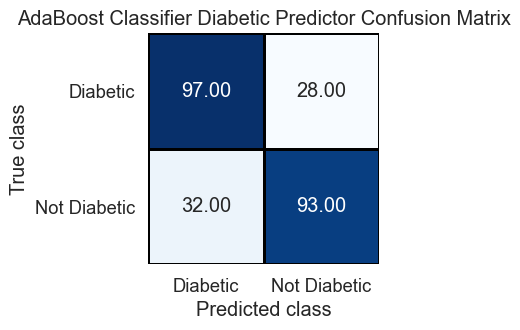

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       0.78      0.75      0.76       129
Not Diabetic       0.74      0.77      0.76       121

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


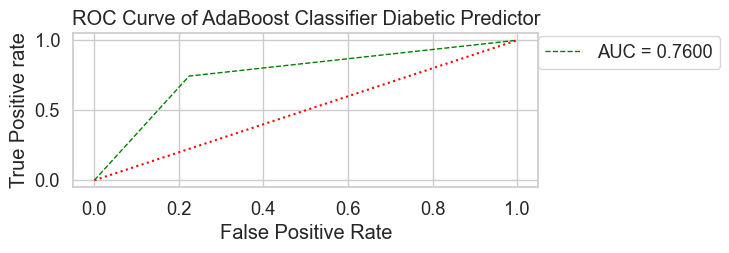

## <span style="color:#111155">AdaBoost Classifier accuracy is around 76 %. </span>

In [89]:
################################################################################################################################
# Import the Machine learning libraries, instantiate the Support Vector Machines Algoritham and fit it with train feat. and labl
################################################################################################################################
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

################################################################################################################################
# Make pridictions on the test dataset
################################################################################################################################
# make prediction for the testing data
y_pred = ABC.predict(x_test)


################################################################################################################################
# test the accuracy
################################################################################################################################


print('Accuracy Score for AdaBoost Classifier is :', np.round(accuracy_score(y_test,y_pred),2))


################################################################################################################################
# Plot the confusion matrix to know the TP,TN,FP,AND FN counts
################################################################################################################################

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Blues,\
            cbar=False).set_title('AdaBoost Classifier Diabetic Predictor Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


################################################################################################################################
# Print the classification report to know the precision, recall, f1-score,support and accuracy
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))

################################################################################################################################
# Plot the ROC curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='green',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of AdaBoost Classifier Diabetic Predictor') 
plt.grid(True)

plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()

printmd('AdaBoost Classifier accuracy is around 76 %. ')

In [90]:
printmd('Gradient Boosting Classifier algoritham.')

## <span style="color:#111155">Gradient Boosting Classifier algoritham.</span>

Accuracy Score for Gradient Boosting Classifier is : 0.79
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[ 92  33]
 [ 20 105]]


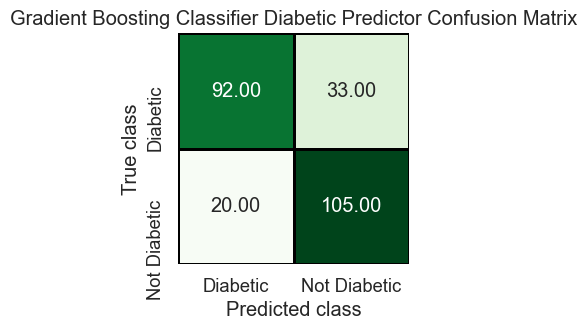

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       0.74      0.82      0.78       112
Not Diabetic       0.84      0.76      0.80       138

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


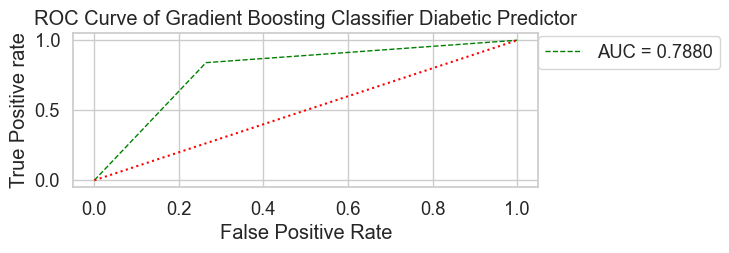

## <span style="color:#111155">Gradient Boosting Classifier accuracy is around 79 %. </span>

In [92]:
################################################################################################################################
# Import the Machine learning libraries, instantiate the Support Vector Machines Algoritham and fit it with train features&labl
################################################################################################################################
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)

################################################################################################################################
# Make pridictions on the test dataset
################################################################################################################################
# make prediction for the testing data
y_pred = GBC.predict(x_test)


################################################################################################################################
# test the accuracy
################################################################################################################################


print('Accuracy Score for Gradient Boosting Classifier is :', np.round(accuracy_score(y_test,y_pred),2))


################################################################################################################################
# Plot the confusion matrix to know the TP,TN,FP,AND FN counts
################################################################################################################################

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Greens,\
            cbar=False).set_title('Gradient Boosting Classifier Diabetic Predictor Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()  


################################################################################################################################
# Print the classification report to know the precision, recall, f1-score,support and accuracy
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))

################################################################################################################################
# Plot the ROC curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='green',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of Gradient Boosting Classifier Diabetic Predictor') 
plt.grid(True)
plt.yticks(rotation=0)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()

printmd('Gradient Boosting Classifier accuracy is around 79 %. ')

In [94]:
printmd('SGD Classifier algoritham.')

## <span style="color:#111155">SGD Classifier algoritham.</span>

Accuracy of SGD Classifier is :  0.66
                                          Confusion Matrix                                          
     ------------------------------------------------------------------------------------------     
[[88 37]
 [48 77]]


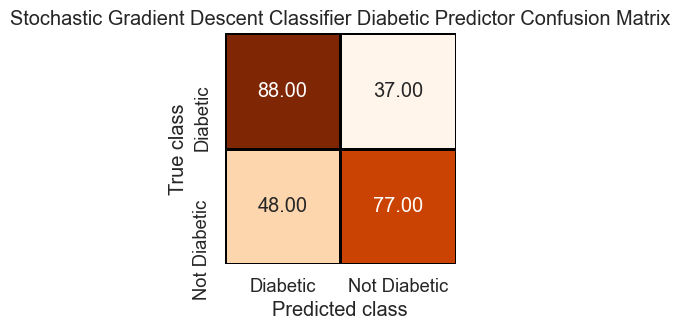

                                       Classification Report                                        
     ------------------------------------------------------------------------------------------     
              precision    recall  f1-score   support

    Diabetic       0.70      0.65      0.67       136
Not Diabetic       0.62      0.68      0.64       114

    accuracy                           0.66       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.66      0.66      0.66       250

                                             ROC Curve                                              
     ------------------------------------------------------------------------------------------     


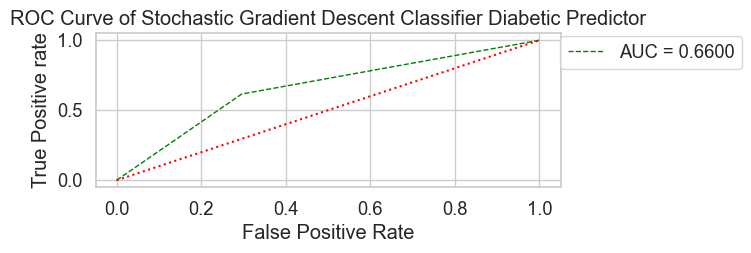

## <span style="color:#111155">SGD Classifier accuracy is poor, just around 66 %. </span>

In [98]:

################################################################################################################################
# Now run another model- SDC Classifier with elasticnet penality with l1 = 60 and l2 =4o percent
################################################################################################################################

SGDC = SGDClassifier(max_iter=1000,verbose=0,penalty='elasticnet',\
                              l1_ratio=.6,random_state=1,n_jobs=None)
SGDC.fit(x_train,y_train)


################################################################################################################################
# do the predictions on the test dataset
################################################################################################################################

# make prediction for the testing data
y_pred = SGDC.predict(x_test)
print('Accuracy of SGD Classifier is : ',np.round(accuracy_score(y_test,y_pred),2))

################################################################################################################################
# Plot the confusion matrix to know the TP,TN,FP,AND FN counts
################################################################################################################################

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Oranges,\
            cbar=False).set_title('Stochastic Gradient Descent Classifier Diabetic Predictor Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()  


################################################################################################################################
# Print the classification report to know the precision, recall, f1-score,support and accuracy
################################################################################################################################
print('Classification Report'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))

################################################################################################################################
# Plot the ROC curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('------------------------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='green',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of Stochastic Gradient Descent Classifier Diabetic Predictor') 
plt.grid(True)
plt.yticks(rotation=0)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()


printmd('SGD Classifier accuracy is poor, just around 66 %. ')

In [99]:
printmd('Decision Tree classifier ')

## <span style="color:#111155">Decision Tree classifier </span>

Accuracy of Decision Tree Classifier is :  0.84


## <span style="color:#111155">                      Features importance chart </span>

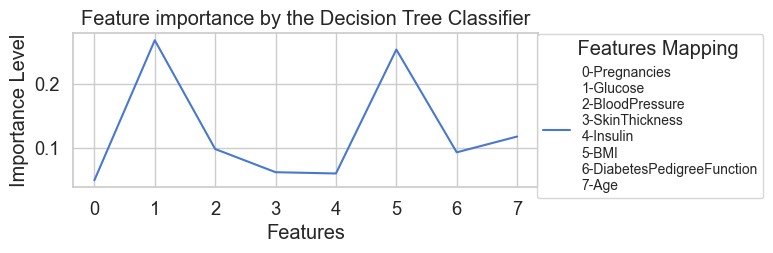

                                          Confusion Matrix                                          
            ----------------------------------------------------------------------------            
[[ 94  31]
 [ 10 115]]


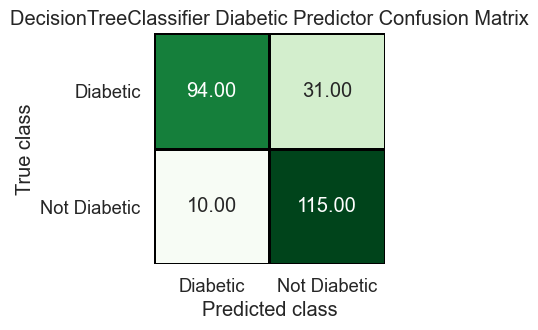

                                       classification report                                        
            ----------------------------------------------------------------------------            
              precision    recall  f1-score   support

    Diabetic       0.75      0.90      0.82       104
Not Diabetic       0.92      0.79      0.85       146

    accuracy                           0.84       250
   macro avg       0.84      0.85      0.83       250
weighted avg       0.85      0.84      0.84       250

                                             ROC Curve                                              
            ----------------------------------------------------------------------------            


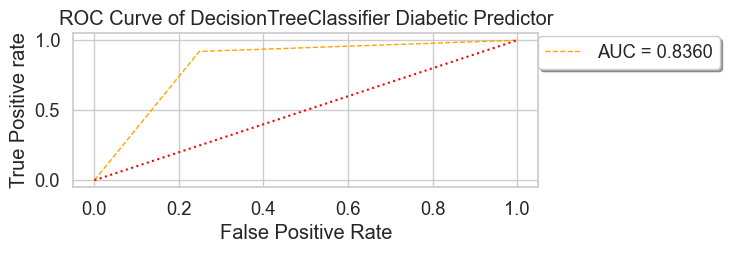

## <span style="color:#111155">Accuracy of Decision Tree Classifier is 84 % </span>

In [103]:
################################################################################################################################
# Now run the Decision Tree Classifier
################################################################################################################################

from sklearn.tree import DecisionTreeClassifier

################################################################################################################################
# instantiate and fit the decision tree classifier with criterion as 'entropy'
################################################################################################################################

DTClassifier = DecisionTreeClassifier(criterion="entropy",splitter='best',random_state=2)
DTClassifier.fit(x_train,y_train)

################################################################################################################################
# perform predictions on the test dataset
################################################################################################################################

y_pred = DTClassifier.predict(x_test)
print('Accuracy of Decision Tree Classifier is : ',np.round(accuracy_score(y_test,y_pred),2))

#printmd('Decision Tree classifier has accuracy around 85%.') 
printmd('                      Features importance chart ')


################################################################################################################################
# plot the feature importance plot from the Decision Tree classifier
################################################################################################################################
a={'0-Pregnancies\n1-Glucose\n2-BloodPressure\n3-SkinThickness\n4-Insulin\n5-BMI\n6-DiabetesPedigreeFunction\n7-Age'}

plt.figure(figsize=(6,2))
plt.plot(DTClassifier.feature_importances_)
plt.title('Feature importance by the Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('Importance Level')
plt.legend(a,title='   Features Mapping',bbox_to_anchor=(0.999, .54, 0.5, 0.5),fontsize='x-small')
plt.show()



################################################################################################################################
# plot the  confusion matrix of the model with limited features
################################################################################################################################
print('Confusion Matrix'.center(100))
print('----------------------------------------------------------------------------'.center(100))

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Greens,\
            cbar=False).set_title('DecisionTreeClassifier Diabetic Predictor Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


################################################################################################################################
# Print the classification report with limited features
################################################################################################################################
print('classification report'.center(100))
print('----------------------------------------------------------------------------'.center(100))

tnames=['Diabetic', 'Not Diabetic']
print(classification_report(y_pred, y_test,target_names=tnames))


################################################################################################################################
# plot the roc_curve with AUC printed in it for the model with limited features
################################################################################################################################
print('ROC Curve'.center(100))
print('----------------------------------------------------------------------------'.center(100))

fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred,pos_label=1)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='orange',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of DecisionTreeClassifier Diabetic Predictor') 
plt.grid(True)
plt.legend(bbox_to_anchor=(.91, .54, 0.5, 0.5),shadow=True)
plt.show()
printmd('Accuracy of Decision Tree Classifier is 84 % ')

In [104]:
printmd('Decision Tree Classifier with limited features : ')

## <span style="color:#111155">Decision Tree Classifier with limited features : </span>

In [106]:
################################################################################################################################
# Lets run the decision tree classifier with limited important features
################################################################################################################################

x_features=HDiabData[['Glucose','BMI','DiabetesPedigreeFunction','Age']]   
y_target=HDiabData['Outcome']
x_features.shape,y_target.shape
# default split as 75% and 25%
x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,random_state=1,stratify=y_target)

################################################################################################################################
# fit the Decison tree classifier with these limited features and check the accuracy. did it increase or decrease?
################################################################################################################################

DTClassifier = DecisionTreeClassifier(criterion="entropy",splitter='best',random_state=4)
DTClassifier.fit(x_train,y_train)
# make prediction for the testing data
y_pred = DTClassifier.predict(x_test)

print('DTClassifier.feature_importances_',DTClassifier.feature_importances_)
print('Accuracy of Decision Tree Classifier with Limited Features is : ', np.round(accuracy_score(y_test,y_pred),2))
printmd('Accuracy of Decision Tree Classifier with Limited Features is less - 80.00 %')
printmd("Accuracy didn't improve with limited features")



DTClassifier.feature_importances_ [0.34803549 0.31046919 0.15159887 0.18989645]
Accuracy of Decision Tree Classifier with Limited Features is :  0.8


## <span style="color:#111155">Accuracy of Decision Tree Classifier with Limited Features is less - 80.00 %</span>

## <span style="color:#111155">Accuracy didn't improve with limited features</span>

In [107]:
################################################################################################################################
# now restore all the features to run some other models
################################################################################################################################

x_features=HDiabData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_target=HDiabData['Outcome']
x_features.shape,y_target.shape
x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,random_state=1,stratify=y_target)
################################################################################################################################
# test the shope of the train and test features and labels files 
################################################################################################################################

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((750, 8), (250, 8), (750,), (250,))

In [108]:
printmd('XGB Classifier and also plot feature importance chart.')

## <span style="color:#111155">XGB Classifier and also plot feature importance chart.</span>

[11:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


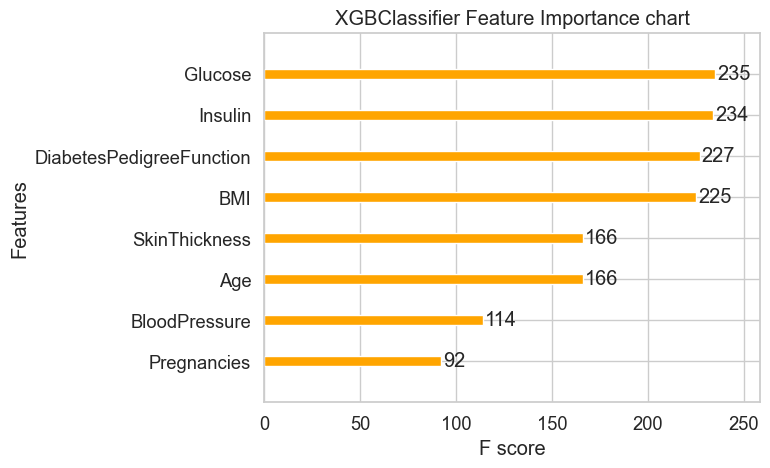

<Figure size 600x350 with 0 Axes>

## <span style="color:#111155">BMI, DPF, Insulin and Glucose have big impact on Diabetic condition</span>

In [109]:

################################################################################################################################
# Import the XGBClassifier and the polt_importance modules
################################################################################################################################

from xgboost import XGBClassifier, plot_importance

################################################################################################################################
# Instantiate the XGBClassifier
################################################################################################################################

XGBC = XGBClassifier()

################################################################################################################################
# Fit the XGB Classifier
################################################################################################################################

XGBCmodel = XGBC.fit(x_train, y_train)


################################################################################################################################
# plot the feature importance chart of the XGB classifier
################################################################################################################################


plot_importance(XGBC, max_num_features=10,show_values=True,height=.25,color='orange',
                title='XGBClassifier Feature Importance chart',importance_type='weight')
plt.figure(figsize=(6,3.5))
plt.show()

printmd('BMI, DPF, Insulin and Glucose have big impact on Diabetic condition')

XGBClassifier Training score: 1.00
XGBClassifier testing accuracy is : 0.804
                                          Confusion Matrix                                          
            ----------------------------------------------------------------------------            
[[ 96  29]
 [ 20 105]]


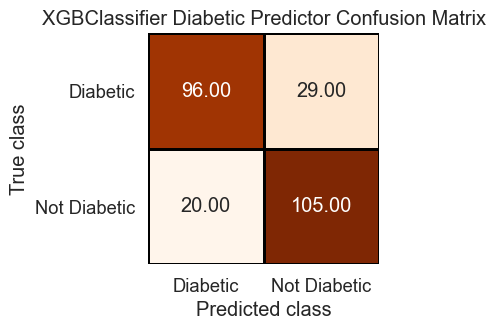

                                       classification report                                        
            ----------------------------------------------------------------------------            
              precision    recall  f1-score   support

    Diabetic       0.77      0.83      0.80       116
Not Diabetic       0.84      0.78      0.81       134

    accuracy                           0.80       250
   macro avg       0.80      0.81      0.80       250
weighted avg       0.81      0.80      0.80       250

                                             ROC Curve                                              
            ----------------------------------------------------------------------------            


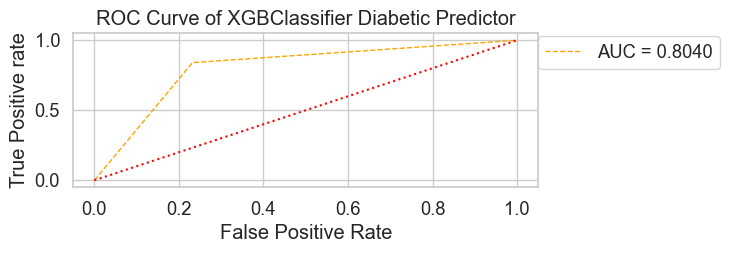

## <span style="color:#111155">XGB Classifier has the test accuracy of around 80.4 %.</span>

In [111]:
################################################################################################################################
# print the training score of the XGB classifier
################################################################################################################################

score = XGBC.score(x_train, y_train)  
print("XGBClassifier Training score: %.2f" % score)

################################################################################################################################
# predict on the test dataset 
################################################################################################################################

y_Pred = XGBC.predict(x_test)

################################################################################################################################
# print the accuracy on the test dataset
################################################################################################################################

print('XGBClassifier testing accuracy is :',accuracy_score(y_test,y_pred))


################################################################################################################################
# plot the confusion matrix of the XGB Classifier
################################################################################################################################
print('Confusion Matrix'.center(100))
print('----------------------------------------------------------------------------'.center(100))
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print(cm)
labels = ['Diabetic', 'Not Diabetic']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Oranges,\
            cbar=False).set_title('XGBClassifier Diabetic Predictor Confusion Matrix')
plt.yticks(rotation=0)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()  


################################################################################################################################
# print the classification report of the xgb classifier
################################################################################################################################

tnames=['Diabetic', 'Not Diabetic']
print('classification report'.center(100))
print('----------------------------------------------------------------------------'.center(100))
print(classification_report(y_pred, y_test,target_names=tnames))



################################################################################################################################
# plot the roc_curve and print the AUC vlaue in it
################################################################################################################################
print('ROC Curve'.center(100))
print('----------------------------------------------------------------------------'.center(100))
fpr0, tpr0, thresh0 = roc_curve(y_test, y_pred)
roc_auc0 = auc(fpr0, tpr0)
plt.figure(figsize=(6,2))
plt.plot(fpr0, tpr0, linestyle='--',color='orange',lw=1, label='AUC = %0.4f'% roc_auc0)
plt.plot((0,1),(0,1),color='red',linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of XGBClassifier Diabetic Predictor') 

plt.grid(True)
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()
printmd('XGB Classifier has the test accuracy of around 80.4 %.')

In [112]:
printmd('Deep Neural Network model to get better accuracy ')

## <span style="color:#111155">Deep Neural Network model to get better accuracy </span>

In [113]:

################################################################################################################################
# import the libraries for deep learning model building
################################################################################################################################
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model 
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization 
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
import time


In [114]:
################################################################################################################################
# build the deep learnig model and compile for health care data analysis 
################################################################################################################################
model = Sequential()
model.add(Input(shape=(8,)))

model.add(Dense(512, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))  
model.add(BatchNormalization())
model.add(Dropout(.4))

model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001))) 
model.add(Dropout(.4))
model.add(BatchNormalization())

model.add(Dense(32, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001))) 
model.add(Dropout(.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1, activation=tf.nn.sigmoid))

opt = Adam(lr=0.00002,beta_1=0.5)  

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [115]:
################################################################################################################################
# define the path for the trained model from local directory and also define the checkpoints on val_accuracy
################################################################################################################################
FILEPATH="./Weights/weights_Diabetic_Detector_Dense512.hdf5"

checkpoint = ModelCheckpoint(FILEPATH, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callback_list = [tqdm_callback, checkpoint]

In [116]:
printmd('Loading the trained Neural Network Model from local library')

## <span style="color:#111155">Loading the trained Neural Network Model from local library</span>

In [162]:
################################################################################################################################
# load the trained model
################################################################################################################################
#model = load_model(FILEPATH)
model = load_model('./Weights/weights_Diabetic_Detector_Dense512 - Copy.hdf5')
opt = Adam(lr=0.000000002,beta_1=0.9)     
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


################################################################################################################################
# print the summary of the loaded module
################################################################################################################################
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               4608      
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
dense_31 (Dense)             (None, 32)               

In [163]:
printmd('Neural Network Model has 11 layers with 147,393 parameters')

## <span style="color:#111155">Neural Network Model has 11 layers with 147,393 parameters</span>

In [164]:
################################################################################################################################
# fit the built model and run it for 1500 epochs
################################################################################################################################
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=callback_list,    
                    batch_size=50, epochs=50, verbose=0)    

Training:   0%|                                                                                0/50 ETA: ?s,  …

Epoch 1/50


0/15                                                                                                         E…


Epoch 00001: val_accuracy did not improve from 0.96400
Epoch 2/50


0/15                                                                                                         E…


Epoch 00002: val_accuracy did not improve from 0.96400
Epoch 3/50


0/15                                                                                                         E…


Epoch 00003: val_accuracy did not improve from 0.96400
Epoch 4/50


0/15                                                                                                         E…


Epoch 00004: val_accuracy did not improve from 0.96400
Epoch 5/50


0/15                                                                                                         E…


Epoch 00005: val_accuracy did not improve from 0.96400
Epoch 6/50


0/15                                                                                                         E…


Epoch 00006: val_accuracy did not improve from 0.96400
Epoch 7/50


0/15                                                                                                         E…


Epoch 00007: val_accuracy did not improve from 0.96400
Epoch 8/50


0/15                                                                                                         E…


Epoch 00008: val_accuracy did not improve from 0.96400
Epoch 9/50


0/15                                                                                                         E…


Epoch 00009: val_accuracy did not improve from 0.96400
Epoch 10/50


0/15                                                                                                         E…


Epoch 00010: val_accuracy did not improve from 0.96400
Epoch 11/50


0/15                                                                                                         E…


Epoch 00011: val_accuracy did not improve from 0.96400
Epoch 12/50


0/15                                                                                                         E…


Epoch 00012: val_accuracy did not improve from 0.96400
Epoch 13/50


0/15                                                                                                         E…


Epoch 00013: val_accuracy did not improve from 0.96400
Epoch 14/50


0/15                                                                                                         E…


Epoch 00014: val_accuracy did not improve from 0.96400
Epoch 15/50


0/15                                                                                                         E…


Epoch 00015: val_accuracy did not improve from 0.96400
Epoch 16/50


0/15                                                                                                         E…


Epoch 00016: val_accuracy did not improve from 0.96400
Epoch 17/50


0/15                                                                                                         E…


Epoch 00017: val_accuracy did not improve from 0.96400
Epoch 18/50


0/15                                                                                                         E…


Epoch 00018: val_accuracy did not improve from 0.96400
Epoch 19/50


0/15                                                                                                         E…


Epoch 00019: val_accuracy did not improve from 0.96400
Epoch 20/50


0/15                                                                                                         E…


Epoch 00020: val_accuracy did not improve from 0.96400
Epoch 21/50


0/15                                                                                                         E…


Epoch 00021: val_accuracy did not improve from 0.96400
Epoch 22/50


0/15                                                                                                         E…


Epoch 00022: val_accuracy did not improve from 0.96400
Epoch 23/50


0/15                                                                                                         E…


Epoch 00023: val_accuracy did not improve from 0.96400
Epoch 24/50


0/15                                                                                                         E…


Epoch 00024: val_accuracy did not improve from 0.96400
Epoch 25/50


0/15                                                                                                         E…


Epoch 00025: val_accuracy did not improve from 0.96400
Epoch 26/50


0/15                                                                                                         E…


Epoch 00026: val_accuracy did not improve from 0.96400
Epoch 27/50


0/15                                                                                                         E…


Epoch 00027: val_accuracy did not improve from 0.96400
Epoch 28/50


0/15                                                                                                         E…


Epoch 00028: val_accuracy did not improve from 0.96400
Epoch 29/50


0/15                                                                                                         E…


Epoch 00029: val_accuracy did not improve from 0.96400
Epoch 30/50


0/15                                                                                                         E…


Epoch 00030: val_accuracy did not improve from 0.96400
Epoch 31/50


0/15                                                                                                         E…


Epoch 00031: val_accuracy did not improve from 0.96400
Epoch 32/50


0/15                                                                                                         E…


Epoch 00032: val_accuracy did not improve from 0.96400
Epoch 33/50


0/15                                                                                                         E…


Epoch 00033: val_accuracy did not improve from 0.96400
Epoch 34/50


0/15                                                                                                         E…


Epoch 00034: val_accuracy did not improve from 0.96400
Epoch 35/50


0/15                                                                                                         E…


Epoch 00035: val_accuracy did not improve from 0.96400
Epoch 36/50


0/15                                                                                                         E…


Epoch 00036: val_accuracy did not improve from 0.96400
Epoch 37/50


0/15                                                                                                         E…


Epoch 00037: val_accuracy did not improve from 0.96400
Epoch 38/50


0/15                                                                                                         E…


Epoch 00038: val_accuracy did not improve from 0.96400
Epoch 39/50


0/15                                                                                                         E…


Epoch 00039: val_accuracy did not improve from 0.96400
Epoch 40/50


0/15                                                                                                         E…


Epoch 00040: val_accuracy did not improve from 0.96400
Epoch 41/50


0/15                                                                                                         E…


Epoch 00041: val_accuracy did not improve from 0.96400
Epoch 42/50


0/15                                                                                                         E…


Epoch 00042: val_accuracy did not improve from 0.96400
Epoch 43/50


0/15                                                                                                         E…


Epoch 00043: val_accuracy did not improve from 0.96400
Epoch 44/50


0/15                                                                                                         E…


Epoch 00044: val_accuracy did not improve from 0.96400
Epoch 45/50


0/15                                                                                                         E…


Epoch 00045: val_accuracy did not improve from 0.96400
Epoch 46/50


0/15                                                                                                         E…


Epoch 00046: val_accuracy did not improve from 0.96400
Epoch 47/50


0/15                                                                                                         E…


Epoch 00047: val_accuracy did not improve from 0.96400
Epoch 48/50


0/15                                                                                                         E…


Epoch 00048: val_accuracy did not improve from 0.96400
Epoch 49/50


0/15                                                                                                         E…


Epoch 00049: val_accuracy did not improve from 0.96400
Epoch 50/50


0/15                                                                                                         E…


Epoch 00050: val_accuracy did not improve from 0.96400


0/24                                                                                               ETA: ?s - E…

0/8                                                                                                ETA: ?s - E…

Train Accu: 0.973, Test Accu: 0.964
Train Loss: 0.114, Test Loss: 0.133
                                             ROC Curve                                              
            ----------------------------------------------------------------------------            


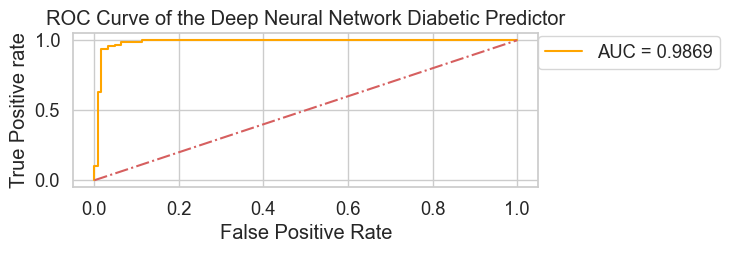

                                       classification report                                        
            ----------------------------------------------------------------------------            
              precision    recall  f1-score   support

    Diabetic       0.96      0.97      0.96       125
Not Diabetic       0.97      0.96      0.96       125

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

                      Confusion matrix Deep Neural Network Diabetic Predictor                       
            ----------------------------------------------------------------------------            
[[121   4]
 [  5 120]]


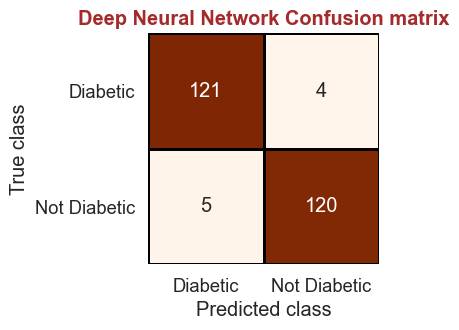

In [152]:
################################################################################################################################
# extract the variables for accuracy and loss reporting
################################################################################################################################
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

################################################################################################################################
# extract the classes predicted by the model
################################################################################################################################
pred1=model.predict_classes(x_test)
a=pred1[pred1==1]
len(a)


################################################################################################################################
# plot the roc curve and print AUC value in it for the deep neural network model
################################################################################################################################
print('ROC Curve '.center(100))
print('----------------------------------------------------------------------------'.center(100))
pred_prob = model.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,2))
plt.plot(fpr, tpr,color='orange', label='AUC = %0.4f'% roc_auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve of the Deep Neural Network Diabetic Predictor')
plt.legend(loc='best',bbox_to_anchor=(0.91, .54, 0.5, 0.5))
plt.show()


################################################################################################################################
# create the classification report of the deep meural network model output
################################################################################################################################
print('classification report'.center(100))
print('----------------------------------------------------------------------------'.center(100))

print(classification_report(y_test, pred1,target_names=['Diabetic','Not Diabetic']))


################################################################################################################################
# create the confusion martrix of predicted and actual values for comparision.
################################################################################################################################


LABELS=['Diabetic','Not Diabetic']

conf_matrix = confusion_matrix(y_test, pred1)
print('Confusion matrix Deep Neural Network Diabetic Predictor'.center(100) )
print('----------------------------------------------------------------------------'.center(100))
print(conf_matrix)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,linewidths=2,linecolor='black',square=True,cbar=False,
            annot=True,robust=True, fmt="d",cmap=plt.cm.Oranges);

plt.title("Deep Neural Network Confusion matrix",fontweight='bold',color='brown')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()

In [165]:
printmd('Deep Neural Network Model has the highest accuracy among all -  96.4%.')

## <span style="color:#111155">Deep Neural Network Model has the highest accuracy among all -  96.4%.</span>

In [166]:
printmd('Finally, let me compare accuracy scores of all models as per the project requirement') 

## <span style="color:#111155">Finally, let me compare accuracy scores of all models as per the project requirement</span>

In [167]:
printmd('KNN Classifier accuracy around -------------------------------------------------- 71.2%,')
printmd('Naive Bayes Classifier accuracy around ----------------------------------------- 69.00%,')
printmd('Support Vector Classifier accuracy around -------------------------------------- 89.00%,')
printmd('Logistic Regression CV accuracy around ---------------------------------------- 73.00%,')
printmd('Random Forest Classifier accuracy around -------------------------------------- 84.00%,')
printmd('Ada Boost Classifier accuracy around --------------------------------------------- 76.00%,')
printmd('Gradient Boosting Classifier accuracy around ---------------------------------- 79.00%,')
printmd('SGD Classifier accuracy is low around ---------------------------------------------- 66.00%,')
printmd('Decision Tree Classifiers accuracy around ---------------------------------------- 84.00%,')
printmd('XGB Classifiers accuracy around ---------------------------------------------------- 80.40%,')
print(' ')
printmd('and Deep Neural Network Model accuracy is best among all ------------ 96.40%.')

## <span style="color:#111155">KNN Classifier accuracy around -------------------------------------------------- 71.2%,</span>

## <span style="color:#111155">Naive Bayes Classifier accuracy around ----------------------------------------- 69.00%,</span>

## <span style="color:#111155">Support Vector Classifier accuracy around -------------------------------------- 89.00%,</span>

## <span style="color:#111155">Logistic Regression CV accuracy around ---------------------------------------- 73.00%,</span>

## <span style="color:#111155">Random Forest Classifier accuracy around -------------------------------------- 84.00%,</span>

## <span style="color:#111155">Ada Boost Classifier accuracy around --------------------------------------------- 76.00%,</span>

## <span style="color:#111155">Gradient Boosting Classifier accuracy around ---------------------------------- 79.00%,</span>

## <span style="color:#111155">SGD Classifier accuracy is low around ---------------------------------------------- 66.00%,</span>

## <span style="color:#111155">Decision Tree Classifiers accuracy around ---------------------------------------- 84.00%,</span>

## <span style="color:#111155">XGB Classifiers accuracy around ---------------------------------------------------- 80.40%,</span>

## <span style="color:#111155">and Deep Neural Network Model accuracy is best among all ------------ 96.40%.</span>